<a href="https://colab.research.google.com/github/mayankraj25/SciKit-Learn/blob/main/Scikit4(KMean).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
uploaded = files.upload()

Saving people_income_data.csv to people_income_data (2).csv


In [43]:
df=pd.read_csv('people_income_data.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Annual Income ($)')

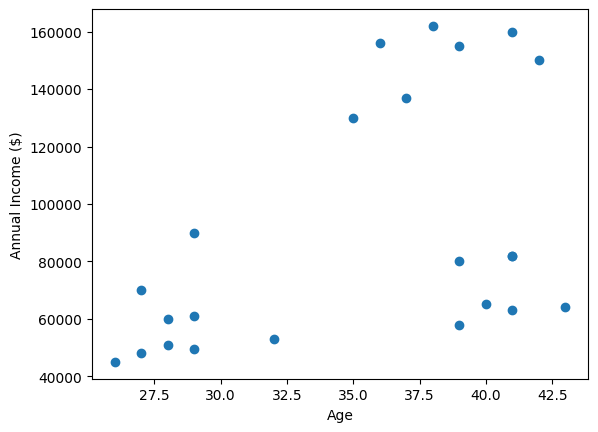

In [44]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')

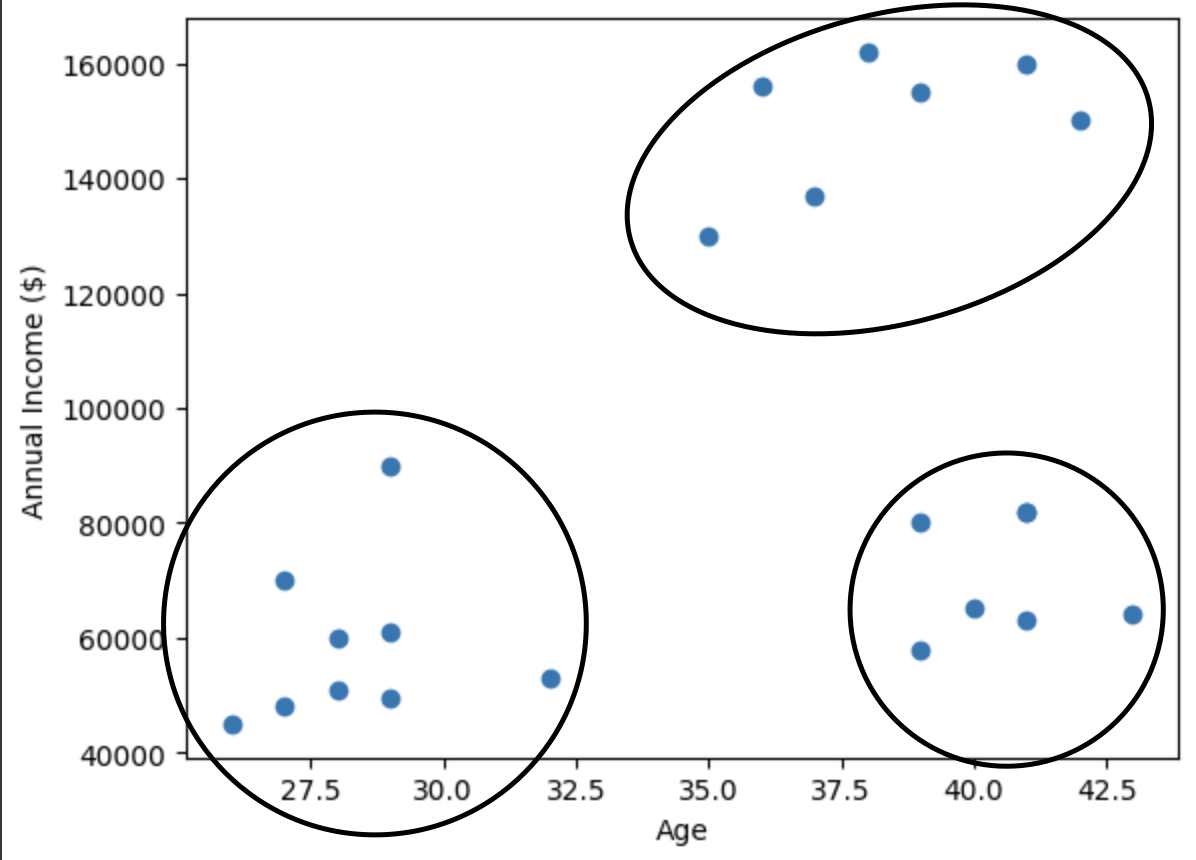

In [45]:
#n_cluster is the number of cluters you want the model to divide it into
model=KMeans(n_clusters=3,random_state=42)
predictions=model.fit_predict(df[['Age','Income($)']])
predictions

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1], dtype=int32)

In [46]:
#Adding a new column to the dataframe called clusters to make the visulization simpler
df['cluster']=predictions
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


<ipython-input-47-082e3af9dab7>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


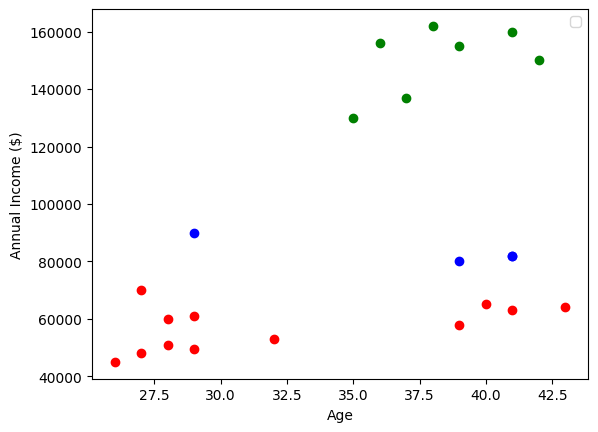

In [47]:
#creating 3 different dataframes divided as per their clusters
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
#plotting all these on the scatter plot with different colours
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Annual Income ($)')
plt.legend()

It seems that the green dots seem tobe clustered well but the othr two regions dont show an high accuracy in terms of clustering .
This happens because the data is not scaled . The vale of age ranges from 0-50 and of salary ranges from 40,000-200,000.
This askes for the need of scaling the data.


In [54]:
# MinMaxScaler scales values to a range between 0 and 1 (default).
# .fit() computes the min and max values of the 'Income($)' column.
# transform(...): Scales the values to the range [0, 1].

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# For Age column
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


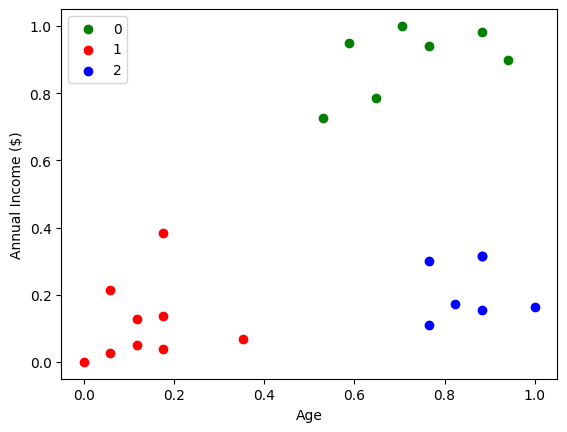

In [61]:
#Plot the scatter plot again with the scaled values after clustering on the new dataset
model=KMeans(n_clusters=3,random_state=42)
predictions=model.fit_predict(df[['Age','Income($)']])

df['cluster']=predictions

df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',label='0')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='1')
plt.scatter(df3.Age,df3['Income($)'],color='blue',label='2')

plt.xlabel('Age')
plt.ylabel('Annual Income ($)')
plt.legend()
plt.show()

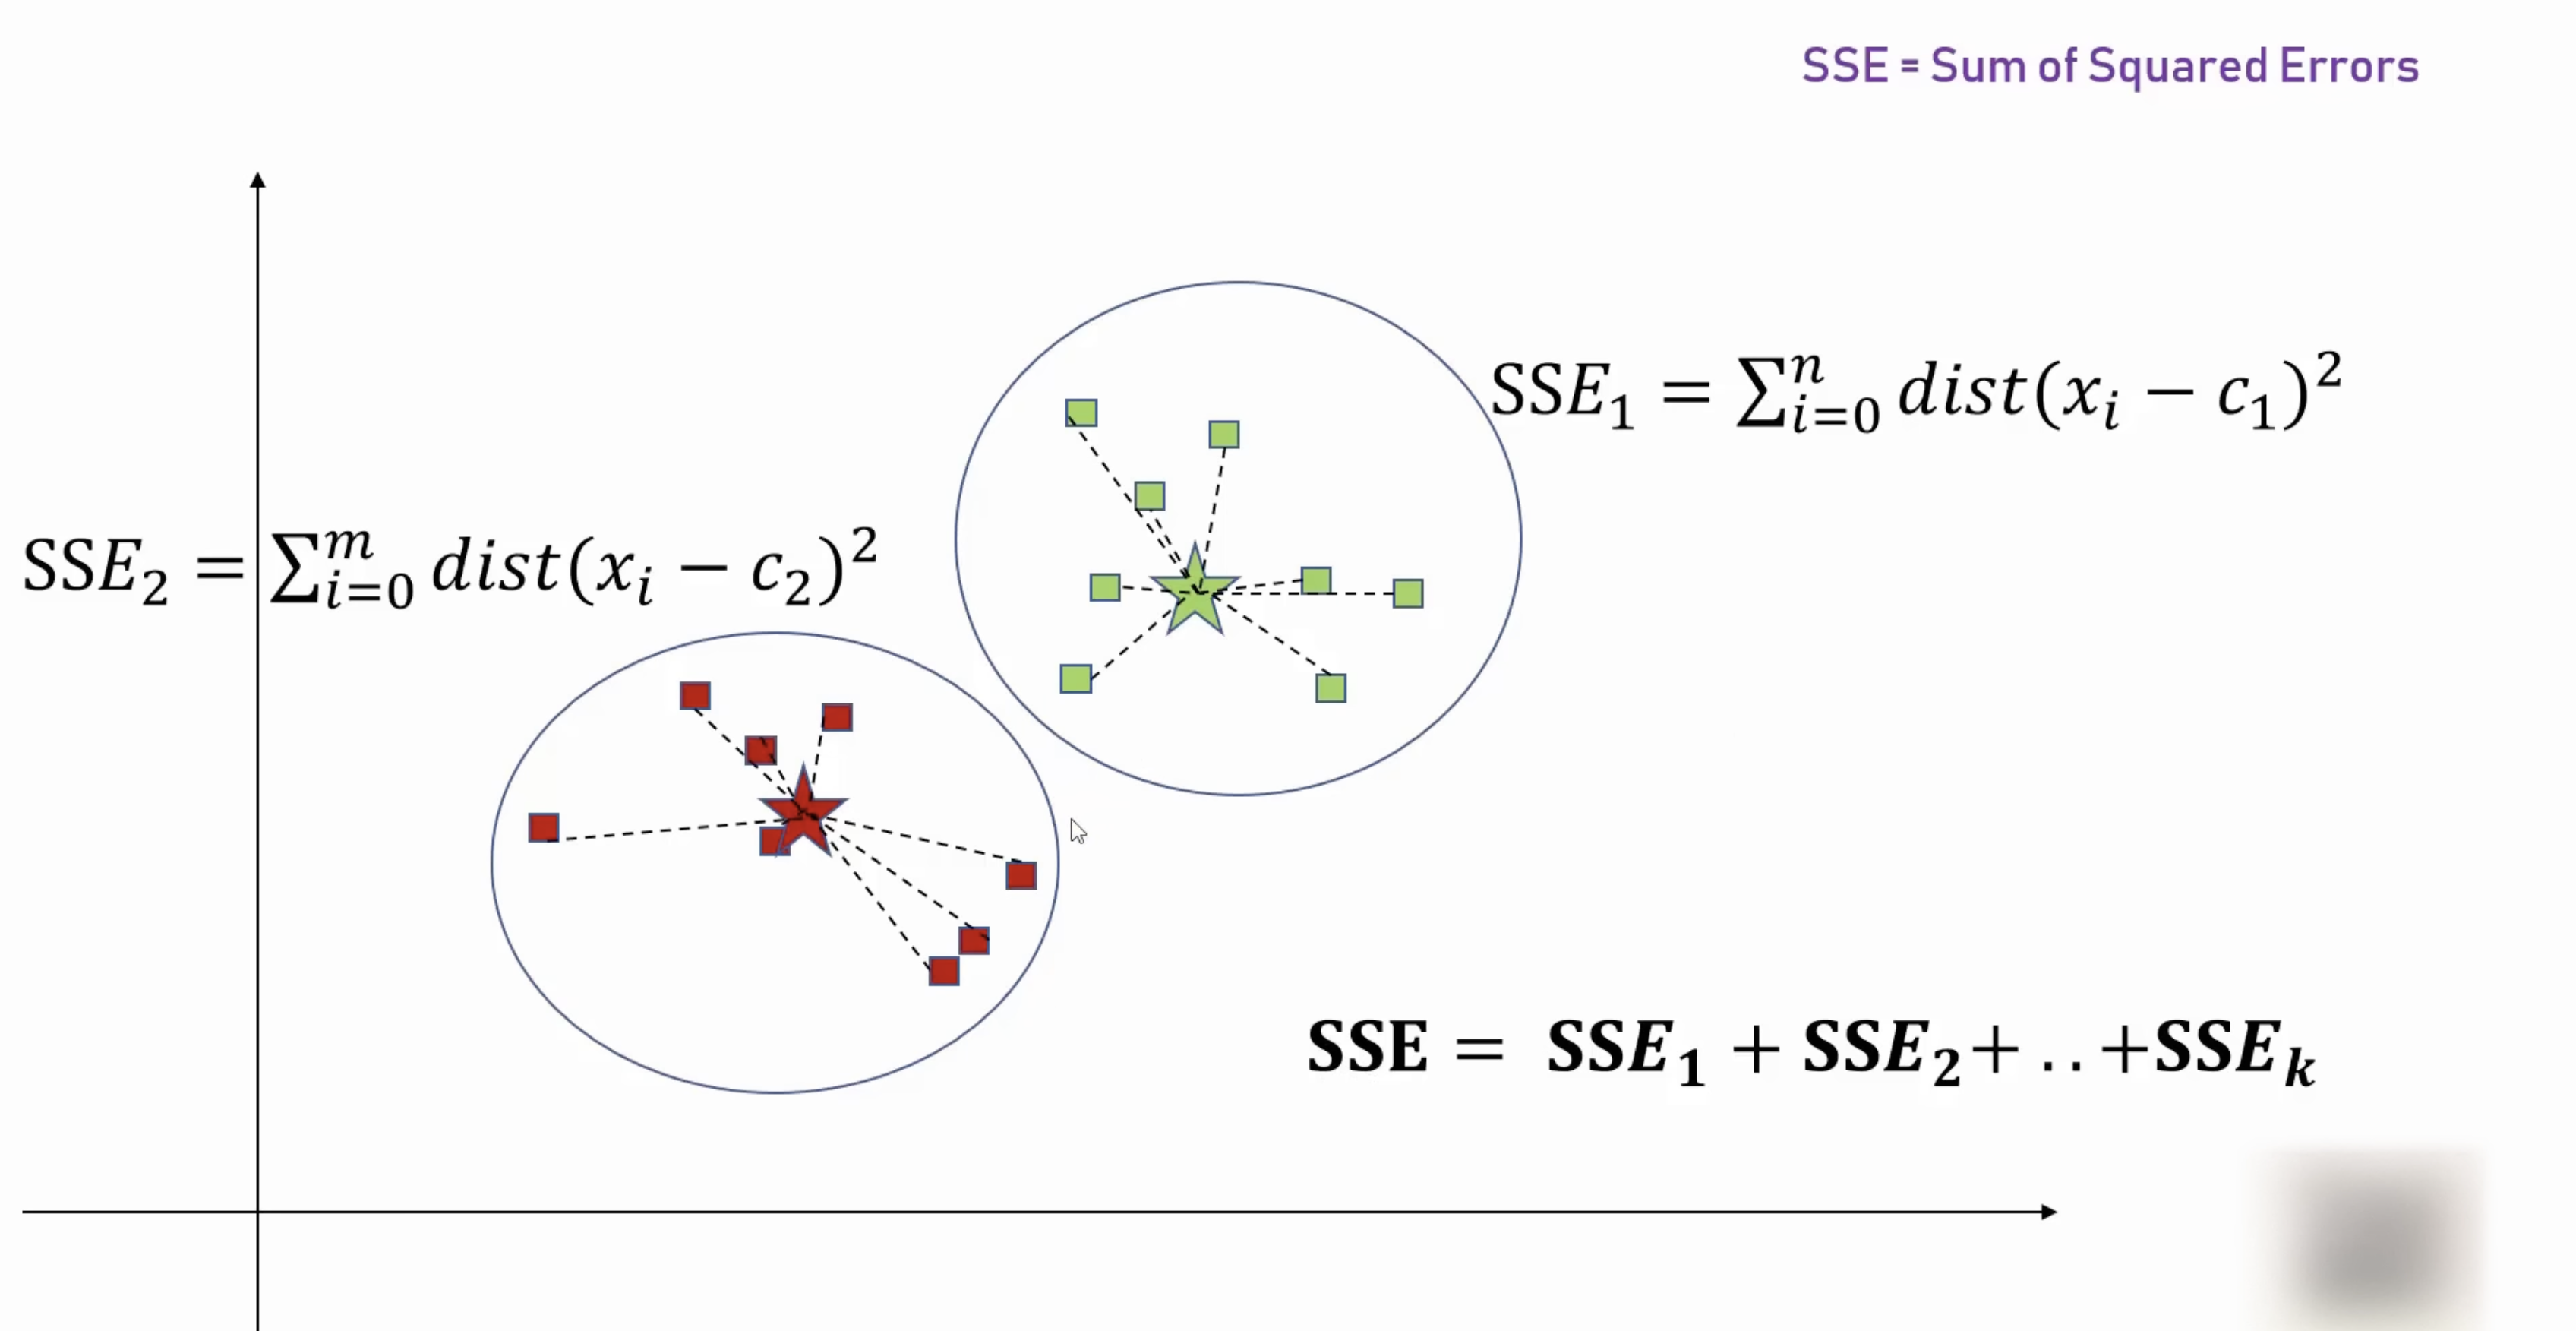

In [64]:
k_range=range(1,10)
sse=[] #squared sum error
for k in k_range:
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(df[['Age','Income($)']])
    sse.append(model.inertia_) # .inertia_ finds the square mean error for each value of k
print(sse)

[5.565461542406991, 2.5686628420012214, 0.4869514579783807, 0.36097781756502767, 0.27405238435759244, 0.24201563674547438, 0.21736080439833433, 0.14954087391833232, 0.13481896155350154]


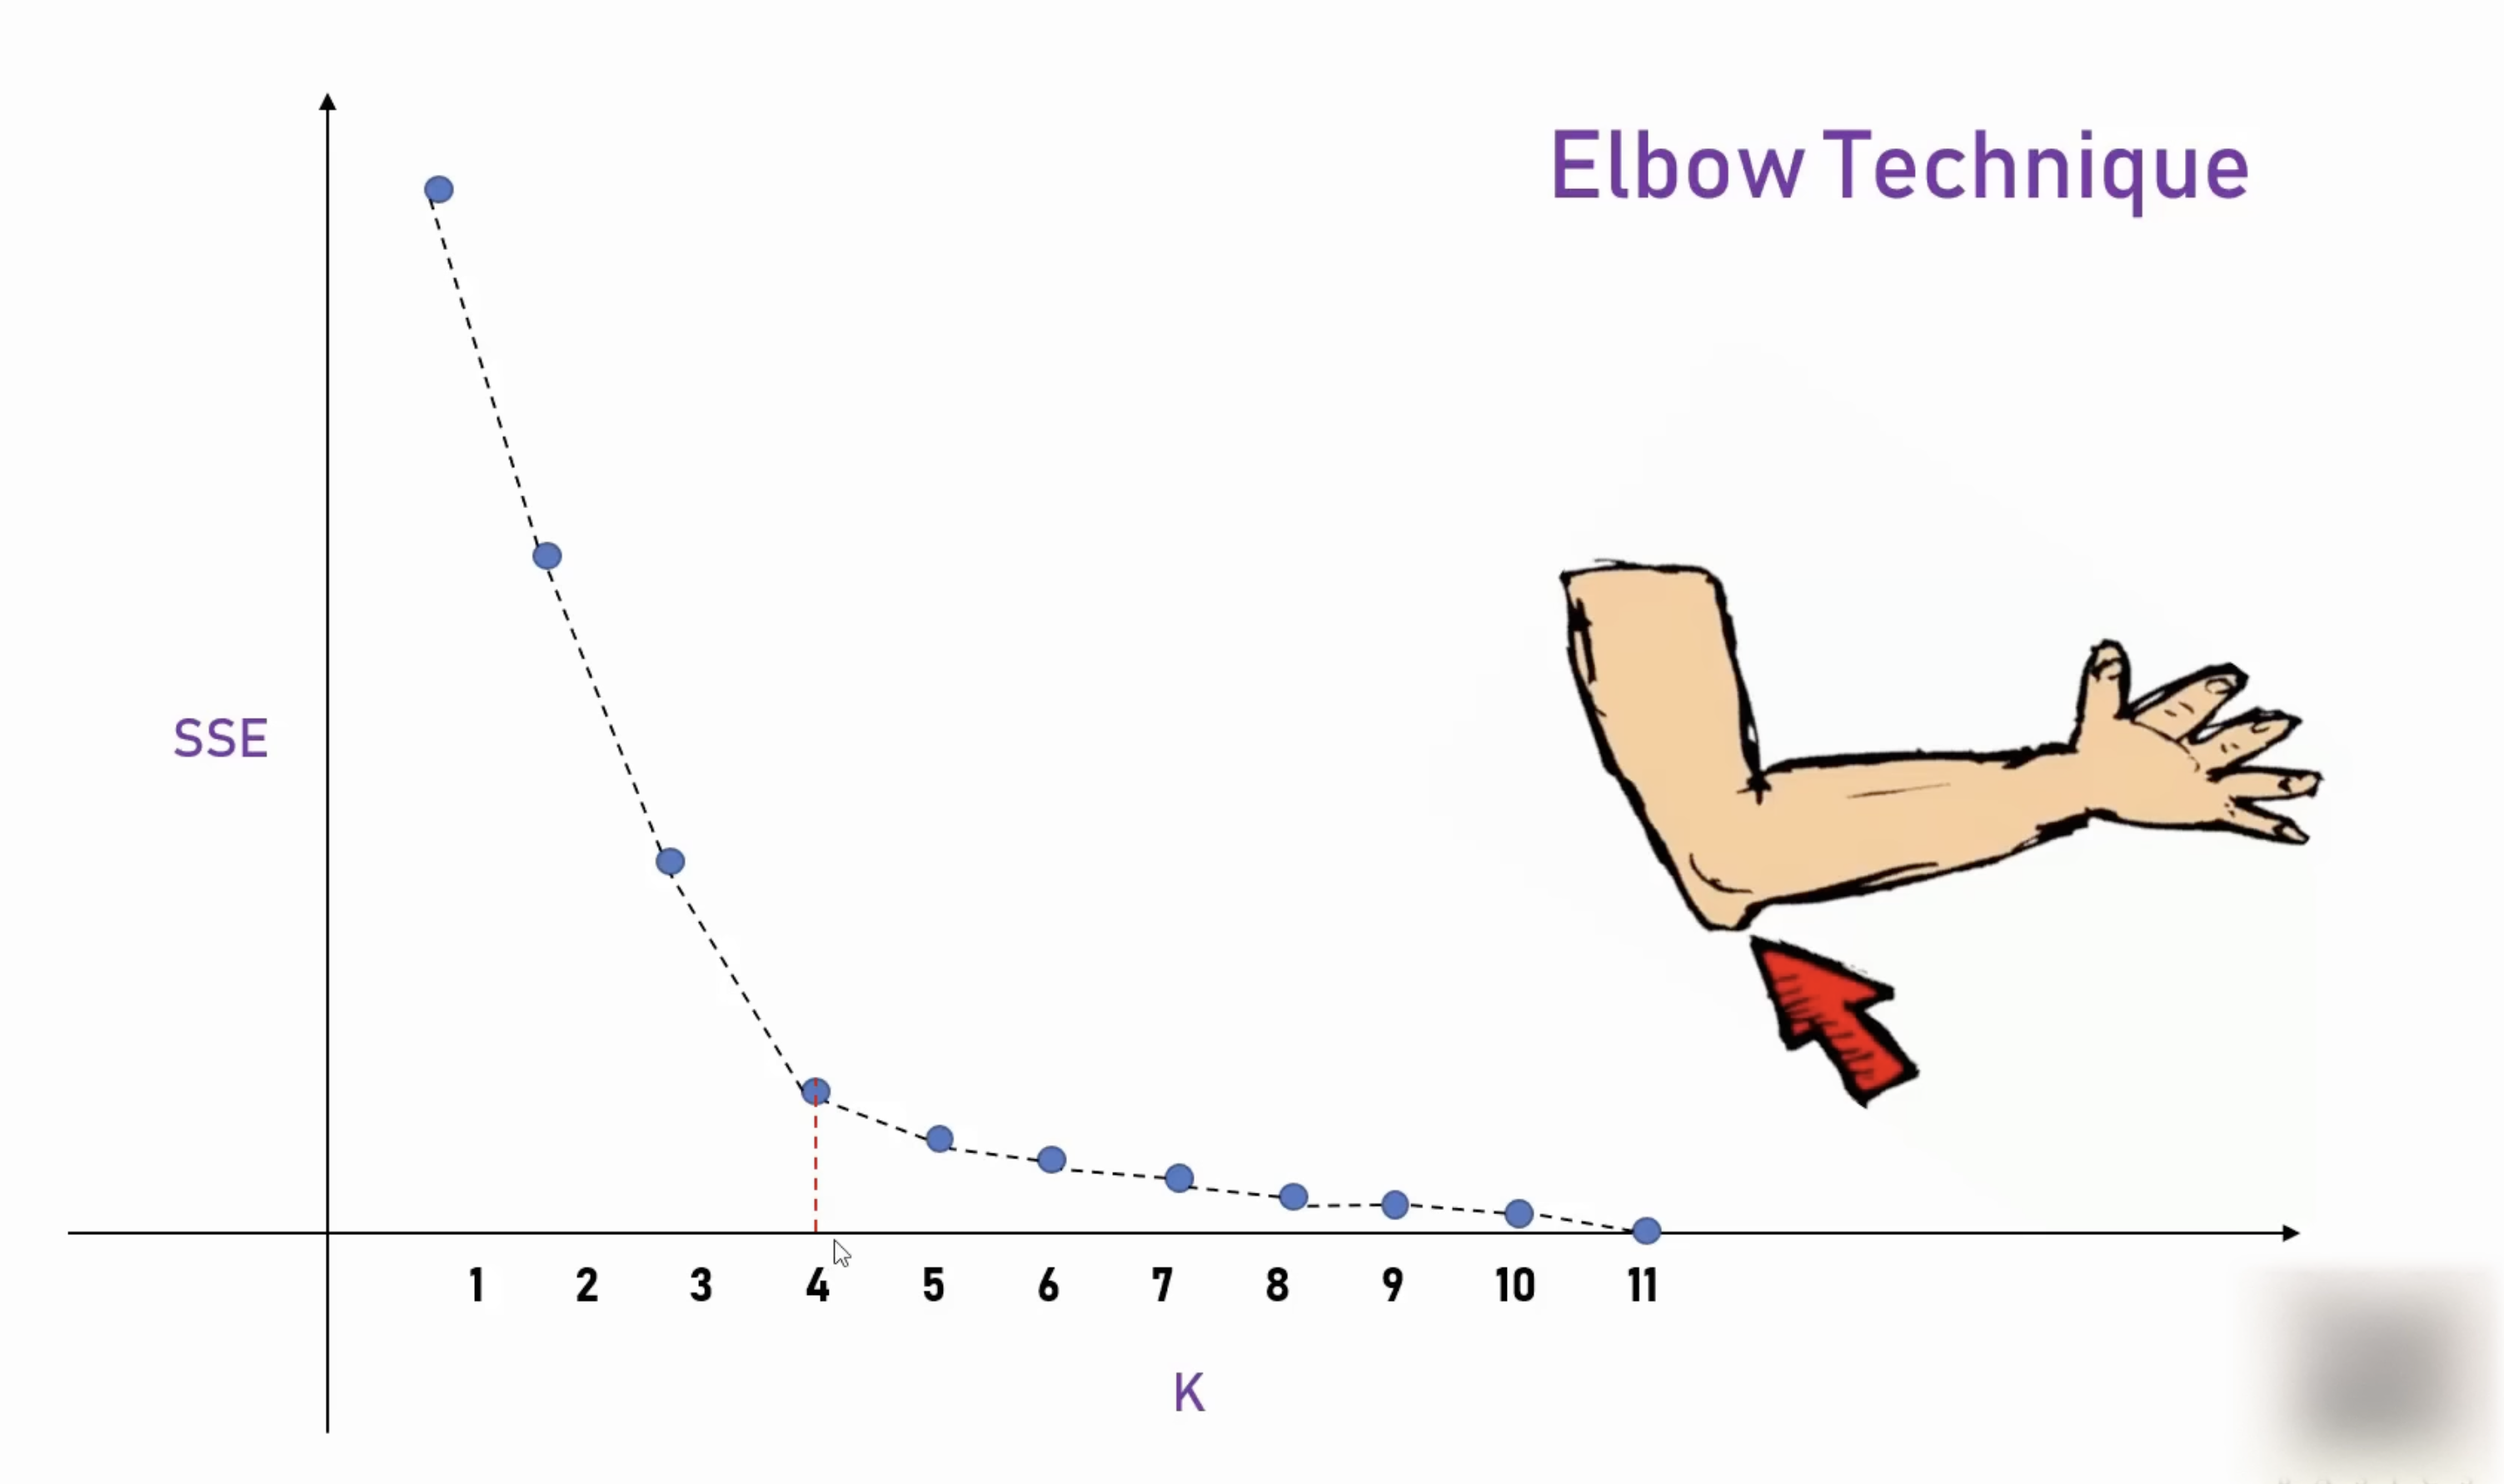

Text(0, 0.5, 'SSE')

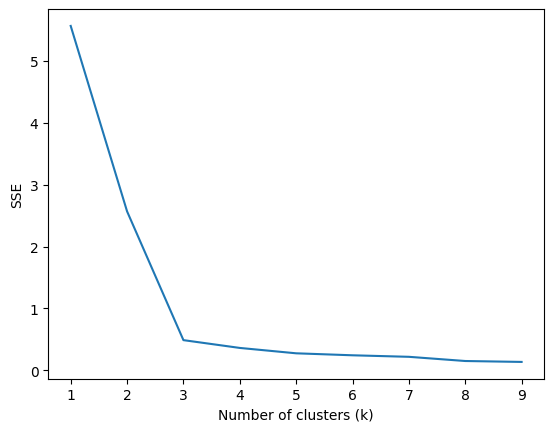

In [67]:
plt.plot(k_range,sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')

#We see the elbow at 3 hence the umber of clusters is 3